<a href="https://colab.research.google.com/github/coronarita/TIL/blob/main/Keras_Ch5_20240520.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 머신러닝의 기본요소

## MNIST에 잡음 픽셀, 0 픽셀 추가하기

In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32")/255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1
)

train_images_with_zero_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1
)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# import matplotlib.pyplot as plt

# plt.imshow(train_images_with_zero_channels[0])
# plt.show()

train_images_with_noise_channels.shape

(60000, 1568)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2

)

In [ ]:
model = get_model()
history_zeros = model.fit(
    train_images_with_zero_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 [==============================] - 9s 24ms/step - loss: 0.2985 - accuracy: 0.9143 - val_loss: 0.1579 - val_accuracy: 0.9538
Epoch 2/10
375/375 [==============================] - 7s 19ms/step - loss: 0.1231 - accuracy: 0.9635 - val_loss: 0.1217 - val_accuracy: 0.9632
Epoch 3/10
375/375 [==============================] - 8s 21ms/step - loss: 0.0804 - accuracy: 0.9759 - val_loss: 0.0885 - val_accuracy: 0.9745
Epoch 4/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0576 - accuracy: 0.9828 - val_loss: 0.0865 - val_accuracy: 0.9743
Epoch 5/10
375/375 [==============================] - 8s 21ms/step - loss: 0.0426 - accuracy: 0.9873 - val_loss: 0.0802 - val_accuracy: 0.9766
Epoch 6/10
375/375 [==============================] - 7s 17ms/step - loss: 0.0332 - accuracy: 0.9899 - val_loss: 0.0797 - val_accuracy: 0.9753
Epoch 7/10
375/375 [==============================] - 8s 21ms/step - loss: 0.0241 - accuracy: 0.9935 - val_loss: 0.0728 - val_accuracy: 0.9793

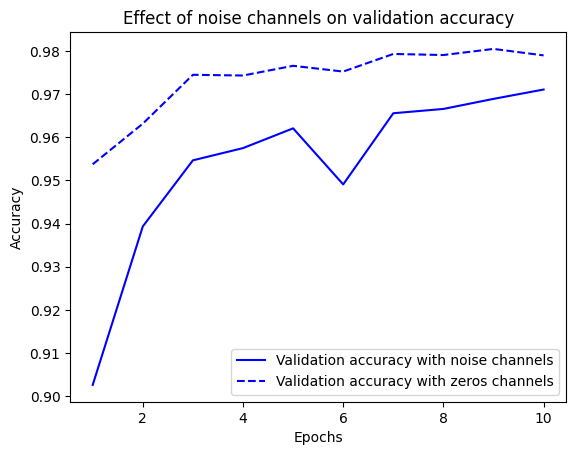

In [ ]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

- 차원이 784 추가되었지만, 분류 정확도에 영향을 받지 않는 것을 확인할 수 있음

## 랜덤하게 섞은 레이블로 모델 훈련하기

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32")/255

# shuffling labels
random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

model.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

model.fit(
train_images, train_labels,
epochs=100,
batch_size=128,
validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 5s 12ms/step - loss: 2.3152 - accuracy: 0.1037 - val_loss: 2.3044 - val_accuracy: 0.1061
Epoch 2/100
375/375 [==============================] - 6s 15ms/step - loss: 2.2996 - accuracy: 0.1130 - val_loss: 2.3107 - val_accuracy: 0.1019
Epoch 3/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2919 - accuracy: 0.1272 - val_loss: 2.3204 - val_accuracy: 0.1010
Epoch 4/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2806 - accuracy: 0.1377 - val_loss: 2.3271 - val_accuracy: 0.0997
Epoch 5/100
375/375 [==============================] - 5s 15ms/step - loss: 2.2663 - accuracy: 0.1480 - val_loss: 2.3333 - val_accuracy: 0.1023
Epoch 6/100
375/375 [==============================] - 4s 12ms/step - loss: 2.2465 - accuracy: 0.1634 - val_loss: 2.3431 - val_accuracy: 0.1005
Epoch 7/100
375/375 [==============================] - 6s 15ms/step - loss: 2.2251 - accuracy: 0.1775 - val_loss: 2.3617 - val_accuracy:

레이블 셔플이 있는데에 불구하고, loss값의 감소하는 경향은 확인할 수 있음

# 머신러닝 모델평가

# 훈련 성능 향상하기

## 경사 하강법의 핵심 파라미터 튜닝하기

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.), # 높은 학습률, 잘못됨
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 12ms/step - loss: 484.0150 - accuracy: 0.2791 - val_loss: 2.4155 - val_accuracy: 0.1618
Epoch 2/10
375/375 [==============================] - 4s 11ms/step - loss: 2.8971 - accuracy: 0.1900 - val_loss: 2.2290 - val_accuracy: 0.1806
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 2.3937 - accuracy: 0.1757 - val_loss: 2.5273 - val_accuracy: 0.1749
Epoch 4/10
375/375 [==============================] - 5s 12ms/step - loss: 2.3957 - accuracy: 0.1758 - val_loss: 2.2747 - val_accuracy: 0.1902
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 2.4706 - accuracy: 0.1818 - val_loss: 2.3931 - val_accuracy: 0.1580
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 2.3694 - accuracy: 0.1778 - val_loss: 2.2843 - val_accuracy: 0.1726
Epoch 7/10
375/375 [==============================] - 5s 13ms/step - loss: 2.3633 - accuracy: 0.1660 - val_loss: 2.3870 - val_accuracy: 0.13

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2), # 0.01로 변경
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 11ms/step - loss: 0.3505 - accuracy: 0.9130 - val_loss: 0.1633 - val_accuracy: 0.9507
Epoch 2/10
375/375 [==============================] - 5s 14ms/step - loss: 0.1253 - accuracy: 0.9649 - val_loss: 0.1426 - val_accuracy: 0.9608
Epoch 3/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0954 - accuracy: 0.9738 - val_loss: 0.1201 - val_accuracy: 0.9716
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0803 - accuracy: 0.9795 - val_loss: 0.1692 - val_accuracy: 0.9638
Epoch 5/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0712 - accuracy: 0.9824 - val_loss: 0.1510 - val_accuracy: 0.9734
Epoch 6/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0595 - accuracy: 0.9859 - val_loss: 0.1831 - val_accuracy: 0.9666
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0524 - accuracy: 0.9877 - val_loss: 0.1968 - val_accuracy: 0.9707

### 구조에 대해 더 나은 가정하기

### 모델 용량 늘리기

#### MNIST Data를 사용한 간단한 로지스틱 회귀 모델

In [7]:
# 로지스틱 회귀를 10개의 유닛으로 간단하게
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 5ms/step - loss: 0.6842 - accuracy: 0.8296 - val_loss: 0.3625 - val_accuracy: 0.9018
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 0.3536 - accuracy: 0.9034 - val_loss: 0.3115 - val_accuracy: 0.9148
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 0.3181 - accuracy: 0.9112 - val_loss: 0.2928 - val_accuracy: 0.9186
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3020 - accuracy: 0.9159 - val_loss: 0.2836 - val_accuracy: 0.9213
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2922 - accuracy: 0.9188 - val_loss: 0.2795 - val_accuracy: 0.9229
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2856 - accuracy: 0.9197 - val_loss: 0.2750 - val_accuracy: 0.9247
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2802 - accuracy: 0.9220 - val_loss: 0.2708 - val_accuracy: 0.9245
Epoch 

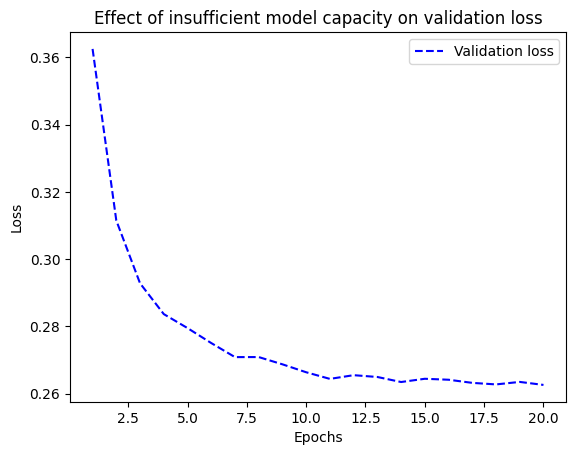

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [9]:
# 깊은 신경망 모델로 변경
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 5ms/step - loss: 0.3634 - accuracy: 0.8981 - val_loss: 0.1846 - val_accuracy: 0.9487
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1650 - accuracy: 0.9506 - val_loss: 0.1401 - val_accuracy: 0.9602
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1182 - accuracy: 0.9646 - val_loss: 0.1196 - val_accuracy: 0.9640
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0906 - accuracy: 0.9736 - val_loss: 0.1029 - val_accuracy: 0.9706
Epoch 5/20
375/375 [==============================] - 3s 8ms/step - loss: 0.0736 - accuracy: 0.9778 - val_loss: 0.1068 - val_accuracy: 0.9673
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0609 - accuracy: 0.9819 - val_loss: 0.0917 - val_accuracy: 0.9735
Epoch 7/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0515 - accuracy: 0.9845 - val_loss: 0.0987 - val_accuracy: 0.9713
Epoch 

# 일반화 성능 향상하기

## 원본 모델

In [10]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 4s 102ms/step - loss: 0.5755 - accuracy: 0.7545 - val_loss: 0.4582 - val_accuracy: 0.8219
Epoch 2/20
30/30 [==============================] - 2s 62ms/step - loss: 0.3661 - accuracy: 0.8799 - val_loss: 0.3489 - val_accuracy: 0.8680
Epoch 3/20
30/30 [==============================] - 2s 73ms/step - loss: 0.2733 - accuracy: 0.9050 - val_loss: 0.2952 - val_accuracy: 0.8815
Epoch 4/20
30/30 [==============================] - 1s 48ms/step - loss: 0.2178 - accuracy: 0.9254 - val_loss: 0.2877 - val_accuracy: 0.8859
Epoch 5/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1795 - accuracy: 0.9375 - val_loss: 0.3036 - val_accuracy: 0.8787
Epoch 6/20
30/30 [==============================] - 2s 56ms/step - loss: 0.1562 - accuracy: 0.9477 - val_loss: 0.3101 - val_accuracy: 0.8776
Epoch 7/20
30/30 [==============================] - 3s 101ms/step - loss: 0.1325 - accur

### 작은 용량의 모델

In [11]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 113ms/step - loss: 0.6357 - accuracy: 0.7557 - val_loss: 0.5751 - val_accuracy: 0.8425
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.5259 - accuracy: 0.8675 - val_loss: 0.4904 - val_accuracy: 0.8601
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.4410 - accuracy: 0.8849 - val_loss: 0.4245 - val_accuracy: 0.8704
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3736 - accuracy: 0.8963 - val_loss: 0.3745 - val_accuracy: 0.8754
Epoch 5/20
30/30 [==============================] - 2s 53ms/step - loss: 0.3204 - accuracy: 0.9086 - val_loss: 0.3403 - val_accuracy: 0.8801
Epoch 6/20
30/30 [==============================] - 2s 55ms/step - loss: 0.2795 - accuracy: 0.9161 - val_loss: 0.3146 - val_accuracy: 0.8844
Epoch 7/20
30/30 [==============================] - 2s 52ms/step - loss: 0.2479 - accuracy: 0.9230 - val_loss: 0.3014 - val_accuracy: 0.8830
Epoch 8/20
3

### 큰 용량의 모델

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 13s 413ms/step - loss: 0.5752 - accuracy: 0.7082 - val_loss: 0.5740 - val_accuracy: 0.7196
Epoch 2/20
19/30 [==================>...........] - ETA: 2s - loss: 0.3464 - accuracy: 0.8535

## 가중치 규제 추가하기

### L2 가중치 추가하기

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002), # 레이어 별 키워드파라미터를 통해 추가
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

### 사용할 수 있는 가중치 종류

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

## Dropout 추가

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)